In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# 1. Mount Google Drive & Load Data Iris
drive.mount('/content/drive')
path_file = '/content/drive/MyDrive/iris/Iris.csv' # Pastikan nama file sesuai di Drive Anda
iris_data = pd.read_csv(path_file)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
print("--- Data Head ---")
print(iris_data.head())

--- Data Head ---
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [10]:
print("\n--- Data Tail ---")
print(iris_data.tail())


--- Data Tail ---
      Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  \
145  146            6.7           3.0            5.2           2.3   
146  147            6.3           2.5            5.0           1.9   
147  148            6.5           3.0            5.2           2.0   
148  149            6.2           3.4            5.4           2.3   
149  150            5.9           3.0            5.1           1.8   

            Species  
145  Iris-virginica  
146  Iris-virginica  
147  Iris-virginica  
148  Iris-virginica  
149  Iris-virginica  


In [11]:
# Cek missing values
print("\n--- Jumlah Missing Values ---")
print(iris_data.isnull().sum())


--- Jumlah Missing Values ---
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


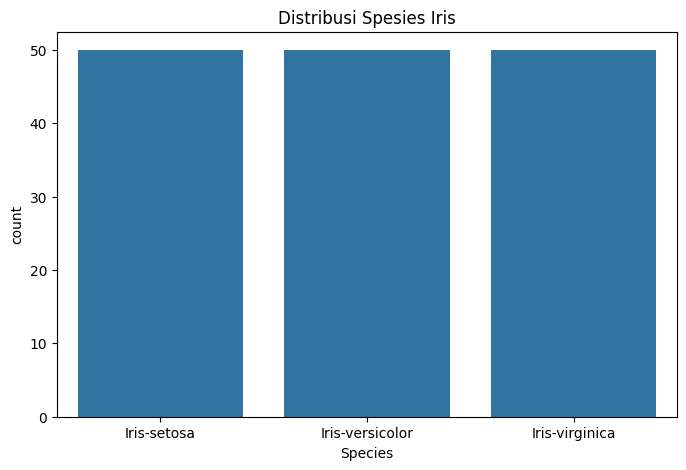

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x="Species", data=iris_data)
plt.title("Distribusi Spesies Iris")
plt.show()

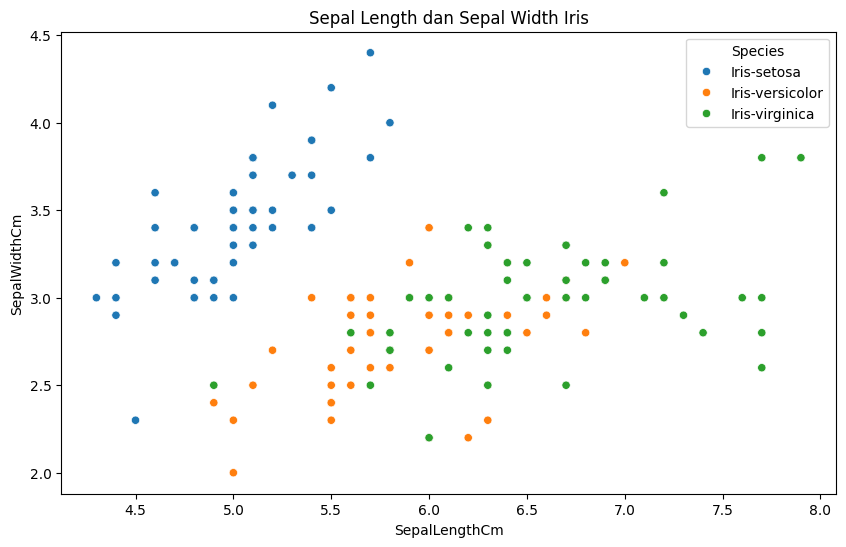

In [13]:
# Scatterplot: Sepal Length vs Sepal Width
plt.figure(figsize=(10,6))
fig1 = sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue='Species', data=iris_data)
fig1.set(title='Sepal Length dan Sepal Width Iris')
plt.show()

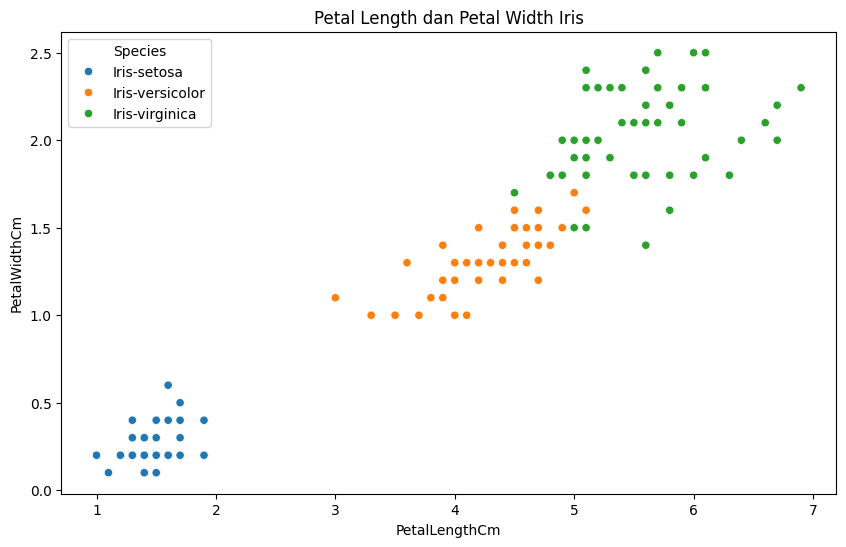

In [14]:
# Scatterplot: Petal Length vs Petal Width
plt.figure(figsize=(10,6))
fig2 = sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue='Species', data=iris_data)
fig2.set(title='Petal Length dan Petal Width Iris')
plt.show()

In [15]:
# 4. Preprocessing
# Menghapus kolom 'Id' karena tidak diperlukan untuk prediksi
if 'Id' in iris_data.columns:
    iris_data = iris_data.drop(columns=['Id'])

# Memisahkan Fitur (X) dan Target (y)
X = iris_data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y = iris_data['Species']

In [16]:
# 5. Split Data Training dan Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nJumlah Data Training: {len(X_train)}")
print(f"Jumlah Data Testing : {len(X_test)}")


Jumlah Data Training: 120
Jumlah Data Testing : 30


In [17]:
# 6. Training dan Testing memakai KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Cek akurasi pada data training dan testing
train_acc = knn.score(X_train, y_train)
test_acc = knn.score(X_test, y_test)

print(f"\nAkurasi KNN pada data Training: {train_acc * 100:.2f}%")
print(f"Akurasi KNN pada data Testing : {test_acc * 100:.2f}%")


Akurasi KNN pada data Training: 96.67%
Akurasi KNN pada data Testing : 100.00%


<Figure size 800x600 with 0 Axes>

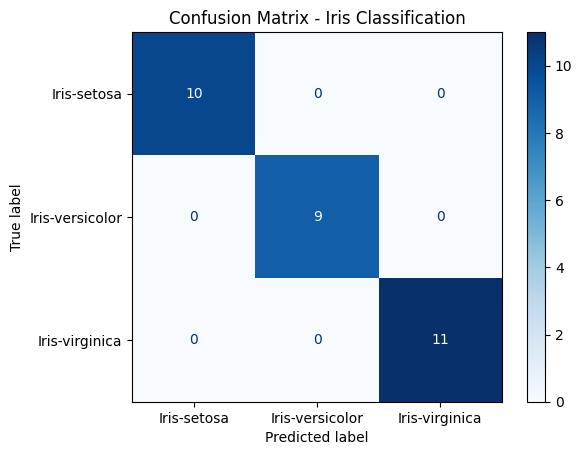

In [18]:
# 7. Confusion Matrix
plt.figure(figsize=(8,6))
class_names = y.unique().tolist()
disp = ConfusionMatrixDisplay.from_estimator(
    knn, X_test, y_test, display_labels=class_names, cmap=plt.cm.Blues
)
disp.ax_.set_title("Confusion Matrix - Iris Classification")
plt.show()

In [20]:


# 8. Simpan ke file .pickle
pickle_filename = '/content/drive/MyDrive/iris/model_iris_knn.pkl'
with open(pickle_filename, 'wb') as file:
    pickle.dump(knn, file)

print(f"\nProses 100% Selesai! Model disimpan sebagai: {pickle_filename}")

# --- Test Load Model (Opsional untuk memastikan) ---
with open(pickle_filename, 'rb') as file:
    loaded_model = pickle.load(file)
print("Model .pickle berhasil dimuat dan siap digunakan untuk API Flask.")


Proses 100% Selesai! Model disimpan sebagai: /content/drive/MyDrive/iris/model_iris_knn.pkl
Model .pickle berhasil dimuat dan siap digunakan untuk API Flask.
